In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import re
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict
from scipy import stats

#For labeling
d = defaultdict(preprocessing.LabelEncoder)

#For sentiment
analyzer = SentimentIntensityAnalyzer()

def cleanHtmlTags(raw_str):
  cleanr = re.compile(r'(<[^>]+>)|(<[^>]+\>)|(\n)|(\')|((http|https)://.* )')

  cleantext = re.sub(cleanr, '', raw_str)

  return cleantext

def cleanColumnTag(col):
    return col.apply(cleanHtmlTags)
    
def numberOfWords(col):
    return col.apply(lambda x : len(nltk.word_tokenize(x)))

def fillUnknown(col):
    return col.fillna("unknown")

def fullTextUser():
    return 

def analyzeSentiment(raw_txt):
    return analyzer.polarity_scores(raw_txt)



In [2]:
dataset = pd.read_csv("./profiles.csv")

In [3]:
dataset.fillna("unknown",inplace=True)

In [4]:
label = dataset[["drinks","offspring","pets","smokes","drugs","diet","religion","sex","job","status","sign","orientation","education"]].apply(lambda x: d[x.name].fit_transform(x))

In [5]:
ageData = pd.DataFrame({"age" : dataset.age})

In [6]:
correlData = ageData.join(label)

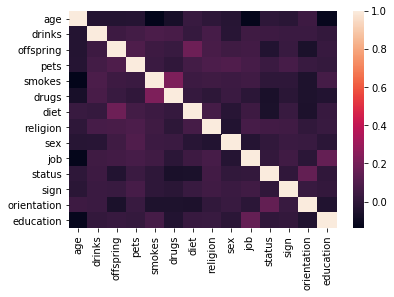

In [8]:
sb.heatmap(correlData.corr(method="kendall"), xticklabels=correlData.columns.values, yticklabels=correlData.columns.values)

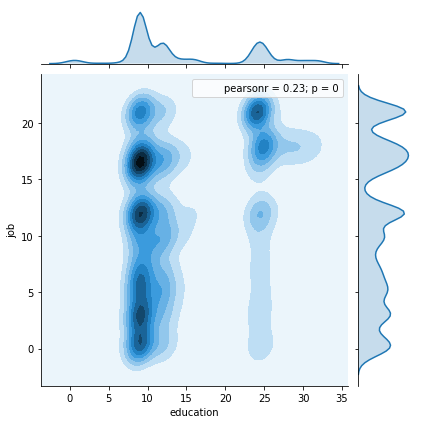

In [8]:
sb.jointplot(x = correlData.education, y = correlData.job, kind="kde")

In [17]:

label

drinks  offspring  pets  smokes  drugs  diet  religion  sex  job  \
0           4          2    14       1      0    10         3    1   19   
1           2          2    14       0      2     6         4    1    8   
2           4         14     5       0      3     0        45    1   21   
3           4          4    10       0      3    18        45    1   18   
4           4         14    14       0      0    16        45    1    0   
5           4          2    10       0      3     3         5    1    3   
6           4         14    14       3      0    10        45    0   21   
7           4          3    14       0      0     3        20    0    0   
8           4          0    14       4      3    10        24    0   21   
9           1         14    14       0      0     3         6    1   18   
10          4         14    15       5      3     3        45    1   21   
11          4         14    10       0      0     3        23    1    1   
12          2          0    15       3      3    16        40    1    6   
13          4         14     9       0      0     3        24    0   16   
14          4          3    13       0      0     3        15    0   12   
15          4          0    13       0      3    10         6    0   10   
16          4         14    14       1      3    16        45    1    6   
17          4          0    15       0      0    16        45    0    1   
18          3         14    14       0      0     8        20    1   10   
19          4          0    14       0      0     3        19    1   17   
20          4         14    12       0      0     3        15    0   16   
21          4          2    14       0      0    16        17    0   18   
22          4          2    14       0      0     3         2    1    7   
23          1         14    14       0      0    14         6    1    5   
24          4         14    10       1      2    10        40    1    0   
25          3          3     6       0      0     0        45    1   10   
26          4         14    12       2      0     3        16    1    2   
27          4         14     7       0      0     0         1    1   12   
28          4         14    14       0      3    16         6    1   21   
29          4         14    15       0      2    16         1    1   12   
...       ...        ...   ...     ...    ...   ...       ...  ...  ...   
59916       4          2    15       0      3    16        39    0   21   
59917       4         14    14       0      0     3        45    1   14   
59918       4         14    14       5      2     8         1    0   12   
59919       5         14    14       3      3    16        21    0   16   
59920       4          0    14       0      2     3         0    0   17   
59921       4         14     6       3      0    16         0    0    6   
59922       4          1    14       0      2    18        45    0   18   
59923       4          3    15       1      0    10        43    1   18   
59924       4         14    15       0      0    16        45    0   21   
59925       4         14    12       0      0     3        22    0   16   
59926       4         14    11       0      0     3        24    0   21   
59927       4          3    11       0      3    16         2    0   12   
59928       4         14    15       4      0     3        24    1   17   
59929       4         14     9       0      2    15         9    1    0   
59930       4         14    14       0      0     0        40    1   13   
59931       3         14    11       0      0    15         4    1   17   
59932       4          4     8       5      2    16         8    1   12   
59933       4         14    15       3      0    16        20    0   21   
59934       4          5     8       0      3     0        39    0   12   
59935       4          9    15       4      0     0        45    0   21   
59936       4          0    15       0      0     3         5    0   12   
59937       4         14    15  

In [7]:
ageWords = pd.concat([dataset.age, dataset.loc[:, "essay0":"essay9"]], axis=1)

In [8]:
ageWords["numWords"] = ageWords.loc[:, "essay0":"essay9"].apply(lambda x : ' '.join(x), axis=1)

In [9]:
ageWords["numWords"] = cleanColumnTag(ageWords["numWords"]);

In [10]:
ageWords["numberW"] = numberOfWords(ageWords.numWords)

In [11]:
ageWords["sentiment"] = ageWords.numWords.apply(analyzeSentiment) 

In [12]:
ageWords["compound"] = ageWords.sentiment.apply(lambda x : x['compound'])

In [13]:
label["compound"] = ageWords["compound"]

In [14]:
label["num_words"] = ageWords["numberW"]

In [68]:
label[["num_words","compound"]].corr(method="spearman")

num_words  compound
num_words   1.000000  0.722401
compound    0.722401  1.000000

NameError: name 'corellData' is not defined

In [86]:
1.4856325413608658

1.4856325413608658

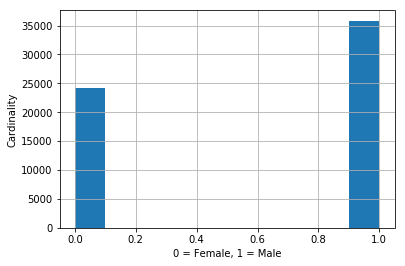

In [95]:
df = label["sex"].hist()
df.set_xlabel("0 = Female, 1 = Male")
df.set_ylabel("Cardinality")

In [101]:
label = label.drop(["num_words","compound"], axis=1)

In [112]:
temp = label[["compound","num_words"]]

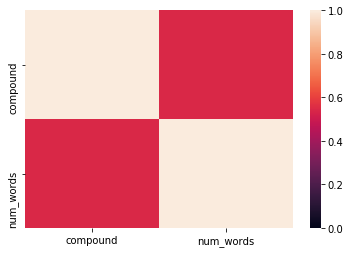

In [116]:
sb.heatmap(temp.corr(method="kendall"), xticklabels=temp.columns.values, yticklabels=temp.columns.values, vmin=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xaa9e294c>]], dtype=object)

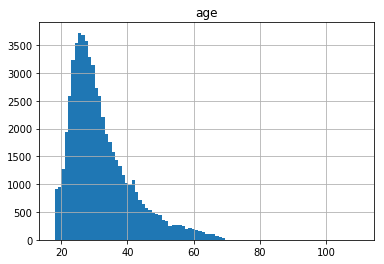

In [10]:
dataset.hist(column="age", bins=91)

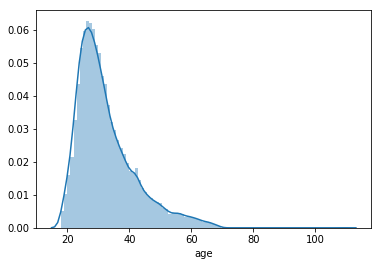

In [15]:
sb.distplot(dataset.age, bins= 93)

In [36]:
sb.jointplot(y = corellData['compound'], x = corellData.age, kind="hex")

NameError: name 'corellData' is not defined

In [133]:
ageWords.sort_values("age", inplace=True)

In [118]:
bins = np.array_split(ageWords, 5)

In [119]:
x = np.asarray([i.numberW.mean() for i in bins])
y = np.asarray([i.age.mean() for i in bins])

In [8]:
tempData = dataset.sort_values("age").reset_index()

In [9]:
tempData.height = tempData.height.replace("unknown", 0)

In [10]:
encoder = preprocessing.LabelEncoder()

In [11]:
encoder.fit(tempData.body_type)

LabelEncoder()

In [12]:
tempData.body_type = encoder.transform(tempData.body_type)

In [13]:
tempData.body_type

0         4
1         3
2        11
3         3
4        11
5        10
6         3
7         2
8        12
9        11
10       10
11        4
12        1
13        4
14        2
15        8
16        2
17        2
18        3
19        1
20        0
21        9
22        1
23       10
24        4
25        2
26        0
27       11
28        0
29        0
         ..
59916     0
59917     4
59918     9
59919     1
59920    10
59921     1
59922     0
59923     4
59924     2
59925     3
59926    10
59927     4
59928     5
59929     4
59930     2
59931     4
59932     4
59933     2
59934     2
59935     2
59936     2
59937     2
59938     2
59939     4
59940     4
59941     0
59942     4
59943     2
59944     1
59945    11
Name: body_type, Length: 59946, dtype: int32

In [135]:
ageWords.reset_index(inplace=True)

In [ ]:
corellData.sort_values("age")

In [14]:
tempData[["age","body_type"]]

age  body_type
0       18          4
1       18          3
2       18         11
3       18          3
4       18         11
5       18         10
6       18          3
7       18          2
8       18         12
9       18         11
10      18         10
11      18          4
12      18          1
13      18          4
14      18          2
15      18          8
16      18          2
17      18          2
18      18          3
19      18          1
20      18          0
21      18          9
22      18          1
23      18         10
24      18          4
25      18          2
26      18          0
27      18         11
28      18          0
29      18          0
...    ...        ...
59916   69          0
59917   69          4
59918   69          9
59919   69          1
59920   69         10
59921   69          1
59922   69          0
59923   69          4
59924   69          2
59925   69          3
59926   69         10
59927   69          4
59928   69          5
59929   69          4
59930   69          2
59931   69          4
59932   69          4
59933   69          2
59934   69          2
59935   69          2
59936   69          2
59937   69          2
59938   69          2
59939   69          4
59940   69          4
59941   69          0
59942   69          4
59943   69          2
59944  109          1
59945  110         11

[59946 rows x 2 columns]

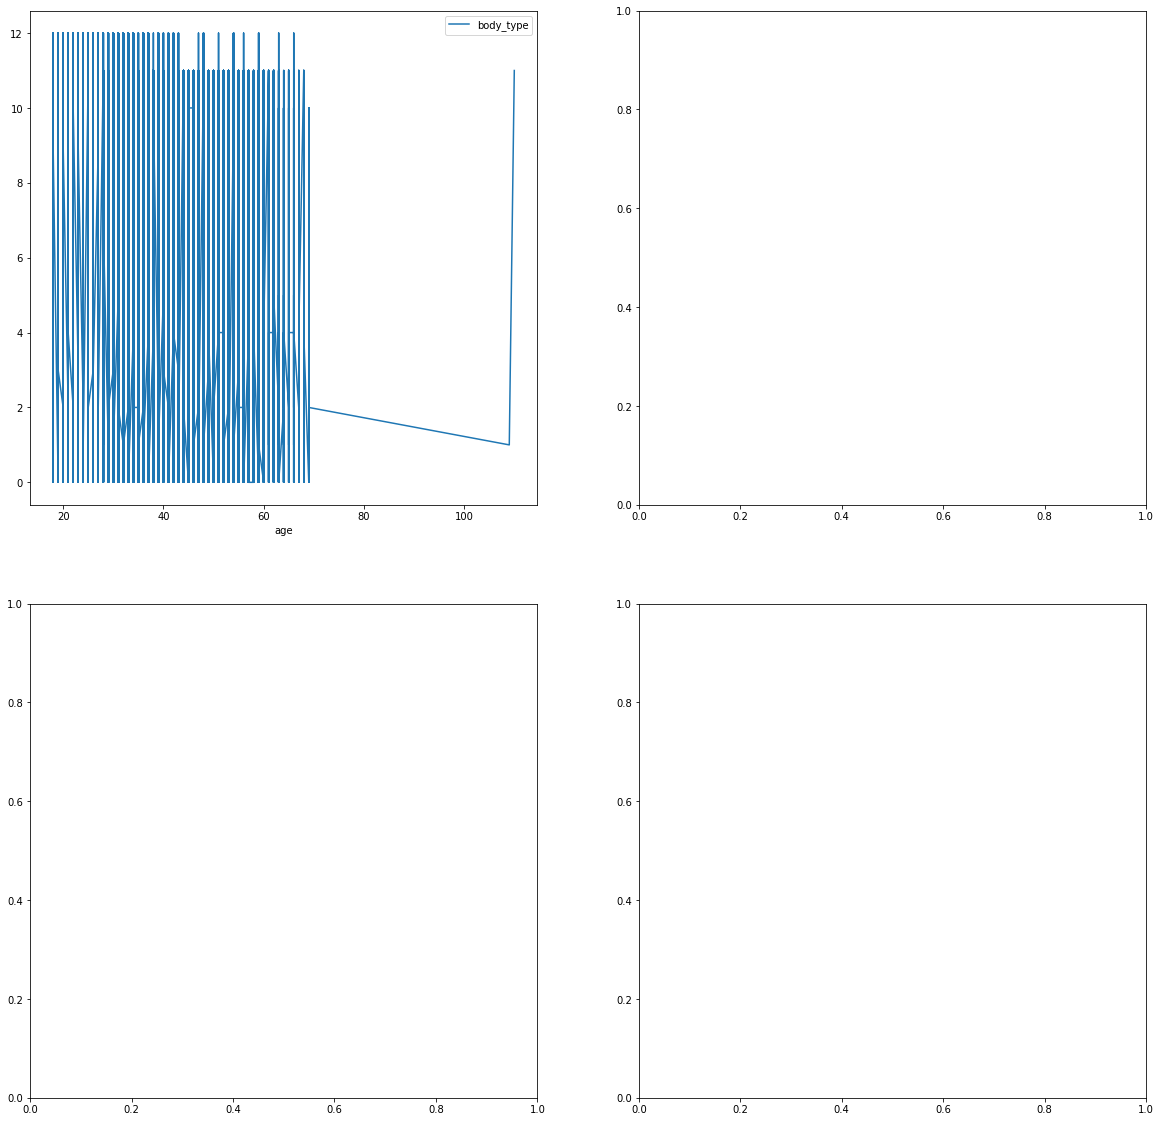

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
tempData[["age","body_type"]].plot(x = "age", y = "body_type", ax=axes[0,0], figsize=(20,20))


In [16]:
nPd = pd.DataFrame({"Age" : tempData.age, "Body" : tempData.body_type})

In [21]:
nPd.Body

0         4
1         3
2        11
3         3
4        11
5        10
6         3
7         2
8        12
9        11
10       10
11        4
12        1
13        4
14        2
15        8
16        2
17        2
18        3
19        1
20        0
21        9
22        1
23       10
24        4
25        2
26        0
27       11
28        0
29        0
         ..
59916     0
59917     4
59918     9
59919     1
59920    10
59921     1
59922     0
59923     4
59924     2
59925     3
59926    10
59927     4
59928     5
59929     4
59930     2
59931     4
59932     4
59933     2
59934     2
59935     2
59936     2
59937     2
59938     2
59939     4
59940     4
59941     0
59942     4
59943     2
59944     1
59945    11
Name: Body, Length: 59946, dtype: int32

In [34]:
nPd = nPd[nPd.Body != 11]

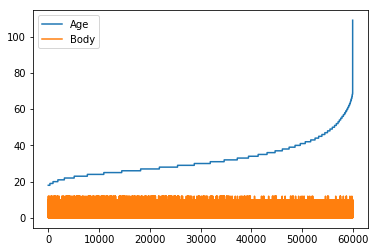

In [35]:
nPd.plot()

In [ ]:
dataset[:] = cleanColumnTag(dataset.essay0)

In [38]:
dataset.essay0 = cleanColumnTag(dataset.essay0)

In [43]:
essayWords = numberOfWords(dataset.essay0)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         59946 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [26]:
freq = nltk.FreqDist(tokenized)

In [27]:
freq.tabulate()

Hello    im     i    'm     ,   and     u     ? 
    1     1     1     1     1     1     1     1 


In [2]:
dataset.fillna("unknown")

age       body_type                 diet      drinks      drugs  \
0       22  a little extra    strictly anything    socially      never   
1       35         average         mostly other       often  sometimes   
2       38            thin             anything    socially    unknown   
3       23            thin           vegetarian    socially    unknown   
4       29        athletic              unknown    socially      never   
5       29         average      mostly anything    socially    unknown   
6       32             fit    strictly anything    socially      never   
7       31         average      mostly anything    socially      never   
8       24         unknown    strictly anything    socially    unknown   
9       37        athletic      mostly anything  not at all      never   
10      35         average      mostly anything    socially    unknown   
11      28         average      mostly anything    socially      never   
12      24         unknown              unknown       often    unknown   
13      30          skinny      mostly anything    socially      never   
14      29            thin      mostly anything    socially      never   
15      39             fit    strictly anything    socially    unknown   
16      33             fit              unknown    socially    unknown   
17      26         average              unknown    socially      never   
18      31         average    mostly vegetarian      rarely      never   
19      33        athletic      mostly anything    socially      never   
20      27         average      mostly anything    socially      never   
21      22        athletic              unknown    socially      never   
22      30             fit      mostly anything    socially      never   
23      30            thin       strictly vegan  not at all      never   
24      33            thin    strictly anything    socially  sometimes   
25      28             fit             anything      rarely      never   
26      22             fit      mostly anything    socially      never   
27      22         average             anything    socially      never   
28      30             fit              unknown    socially    unknown   
29      32             fit              unknown    socially  sometimes   
...    ...             ...                  ...         ...        ...   
59916   29             fit              unknown    socially    unknown   
59917   26             fit      mostly anything    socially      never   
59918   27    full figured    mostly vegetarian    socially  sometimes   
59919   40        athletic              unknown     unknown    unknown   
59920   22         unknown      mostly anything    socially  sometimes   
59921   33             fit              unknown    socially      never   
59922   22            thin           vegetarian    socially  sometimes   
59923   22      overweight    strictly anything    socially      never   
59924   25         unknown              unknown    socially      never   
59925   28         average      mostly anything    socially      never   
59926   28        athletic      mostly anything    socially      never   
59927   26    full figured              unknown    socially    unknown   
59928   29         average      mostly anything    socially      never   
59929   27         average  strictly vegetarian    socially  sometimes   
59930   41           curvy             anything    socially      never   
59931   24             fit  strictly vegetarian      rarely      never   
59932   21         average              unknown    socially  sometimes   
59933   30         unknown              unknown    socially      never   
59934   43         average             anything    socially    unknown   
59935   33           curvy             anything    socially      never   
59936   25         average      mostly anything    socially      never   
59937   32            thin             anything    socially    unknown   
59938   48 

In [118]:
analyzer = SentimentIntensityAnalyzer()

In [111]:
dataset.essay0.fillna("unknown", inplace=True)

In [115]:
dataset.essay0 = dataset.essay0.apply(cleanHtmlTags)

In [120]:
sentimentEssay0 = dataset.essay0.apply(analyzer.polarity_scores)

In [121]:
dataset["sexInt"] = dataset["sex"].apply(convertSex)

NameError: name 'sentimentEssay0' is not defined

In [3]:
dataset["statusInt"] = dataset["status"].apply(convertStatus)

In [4]:
dataset.hist(column="statusInt", label = "Status")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002476CAB9D30>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001676D148400>]],
      dtype=object)

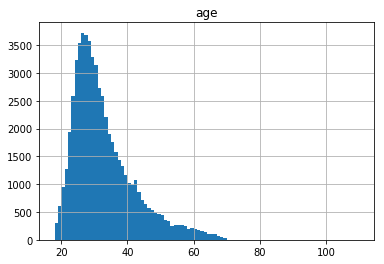

In [83]:
dataset.hist(column = "age", bins = 92)

In [5]:
analyzer = SentimentIntensityAnalyzer()


In [10]:
dataset.essay3.head(100)

0     the way i look. i am a six foot half asian, ha...
1                                               unknown
2     my large jaw and large glasses are the physica...
3                     socially awkward but i do my best
4               i smile a lot and my inquisitive nature
5     i have a big smile. i also get asked if i'm we...
6                                 i am the last unicorn
7     i'm rather approachable (a byproduct of being ...
8     i'm freakishly blonde and have the same name a...
9                                             i'm short
10                                  my huge goofy smile
11    the way i dress. some days it's hats, other da...
12                                              unknown
13                                              unknown
14    well, i get the most compliments on my butt, s...
15                                        you tell me:)
16    lately, i keep getting asked "are you with the...
17    physically-i've been told my eyes. people 

In [34]:
dataset.essay0.head(-1)

0        about me:<br />\n<br />\ni would love to think...
1        i am a chef: this is what that means.<br />\n1...
2        i'm not ashamed of much, but writing public te...
3                i work in a library and go to school. . .
4        hey how's it going? currently vague on the pro...
5        i'm an australian living in san francisco, but...
6        life is about the little things. i love to lau...
7                                                  unknown
8                                                  unknown
9        my names jake.<br />\ni'm a creative guy and i...
10       update: i'm seeing someone, so off the market ...
11       i was born in wisconsin, grew up in iowa, and ...
12                                       bang my shit bang
13                                                 unknown
14                                                 unknown
15                                                 unknown
16       i just moved to the bay area from austin, tx (.

In [14]:
compounds = pd.DataFrame(dataset.essay3)

In [15]:
cleanedEssay = pd.DataFrame(dataset.essay3)

In [18]:
def createCompounds(raw):
    escapedStr = cleanHtmlTags(raw)
    vs = analyzer.polarity_scores(escapedStr)
    return vs["compound"]

In [19]:
compounds["valence"] = compounds["essay3"].apply(lambda x : createCompounds(x))

In [20]:
compounds["valence"] = compounds["valence"].sort_values(ascending=False).reset_index(drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002476D18E828>]],
      dtype=object)

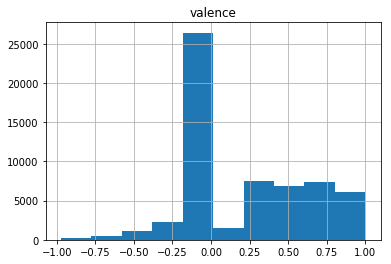

In [22]:
compounds.hist(column="valence", bins=10)

In [24]:
compounds0 = pd.DataFrame(dataset.essay0)

In [27]:
erasedTags = pd.DataFrame(compounds0)

In [29]:
compounds0["valence"] = compounds0["essay0"].apply(lambda x : createCompounds(x))

In [31]:
compounds0["valence"] = compounds0["valence"].sort_values(ascending=False).reset_index(drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002476D3E4B70>]],
      dtype=object)

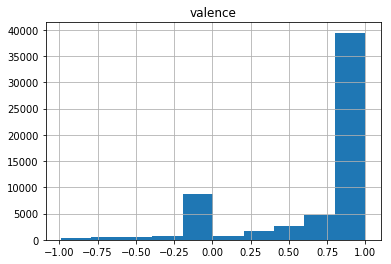

In [35]:
compounds0.hist(column="valence", bins=10)

In [36]:
compounds0.head(-1)

essay0  valence
0      about me:<br />\n<br />\ni would love to think...   1.0000
1      i am a chef: this is what that means.<br />\n1...   1.0000
2      i'm not ashamed of much, but writing public te...   1.0000
3              i work in a library and go to school. . .   0.9999
4      hey how's it going? currently vague on the pro...   0.9999
5      i'm an australian living in san francisco, but...   0.9999
6      life is about the little things. i love to lau...   0.9999
7                                                unknown   0.9999
8                                                unknown   0.9999
9      my names jake.<br />\ni'm a creative guy and i...   0.9999
10     update: i'm seeing someone, so off the market ...   0.9999
11     i was born in wisconsin, grew up in iowa, and ...   0.9999
12                                     bang my shit bang   0.9999
13                                               unknown   0.9999
14                                               unknown   0.9999
15                                               unknown   0.9999
16     i just moved to the bay area from austin, tx (...   0.9999
17     to sum myself in whole: i have adventurous ten...   0.9999
18     some of my favorite things:<br />\nriding my m...   0.9999
19     i relocated to san francisco half a year ago. ...   0.9999
20     i grew up in a small town in the midwest and h...   0.9999
21     my name is ashley and i live in san francisco....   0.9998
22     i tend to think the same way a comedian does a...   0.9998
23     here's a completely fake summary i wrote while...   0.9998
24     bay area transplant six years or so now, strai...   0.9998
25     hey to all, hope all is well and your having a...   0.9998
26     full-time student, full-time square. i change ...   0.9998
27     i suck at these things, but here it goes. i'm ...   0.9998
28     i moved here recently and love this place. i'm...   0.9998
29     i'm told i can get along with anyone - a produ...   0.9998
...                                                  ...      ...
59915  i'm easygoing almost to a fault, and intereste...  -0.9578
59916  i moved to sf 2 years ago from tennessee and l...  -0.9597
59917                         i am a master of mischief.  -0.9600
59918  me in a nut shell...i am a lesbian tom-boy fem...  -0.9643
59919  southern charm with california style....i'm a ...  -0.9656
59920  i'd like your finest milksteak please. and not...  -0.9659
59921  just moved back to the bay from a decade in la...  -0.9661
59922  just kind of a silly girl. super geek. ultra n...  -0.9676
59923  i like hanging out with friends and meeting ne...  -0.9680
59924  take clare from six feet under and sprinkle in...  -0.9685
59925  i'm a northern california native and a san fra...  -0.9706
59926                                            unknown  -0.9719
59927  my interests dictate that i should really be a...  -0.9730
59928  i'm here to perhaps, meet new friends and to g...  -0.9752
59929  i like iced tea, old tv sets, wearing brown cl...  -0.9758
59930                                            unknown  -0.9779
59931  born in southern india, grew up in dubai, live...  -0.9798
59932  i'm tall, good looking, nice hair, and a sarca...  -0.9806
59933  i'm a southern girl from tennesse who moved to...  -0.9811
59934  i'm an east coast/west coast hybrid who's live...  -0.9812
59935  i am a mom first and foremost. currently separ...  -0.9815
59936                                            unknown  -0.9825
59937  a cautious photo for a cautious dude (i'm havi...  -0.9831
59938  i was born, raised and live in the san francis...  -0.9834
59939  hi there and thanks for checking out my profil...  -0.9842
59940  real deal: i am sensitive (sorry, tears includ...  -0.9849
59941  vibrant, expressive, caring optimist. i love b...  -0.9855
59942  i'm nick.<br />\ni never know what to write ab...  -0.9860
59943  hello! i enjoy traveling, watching movies, and...  -0.9886
59944  "all i have in th

In [98]:
cleanedEssay["essay3"] = cleanedEssay["essay3"].apply(cleanHtmlTags)

In [101]:
cleanedEssay.head(-1)

essay3
0      the way i look. i am a six foot half asian, ha...
1                                                unknown
2      my large jaw and large glasses are the physica...
3                      socially awkward but i do my best
4                i smile a lot and my inquisitive nature
5      i have a big smile. i also get asked if i'm we...
6                                  i am the last unicorn
7      i'm rather approachable (a byproduct of being ...
8      i'm freakishly blonde and have the same name a...
9                                              i'm short
10                                   my huge goofy smile
11     the way i dress. some days it's hats, other da...
12                                               unknown
13                                               unknown
14     well, i get the most compliments on my butt, s...
15                                         you tell me:)
16     lately, i keep getting asked "are you with the...
17     physically-i've been told my eyes. people usua...
18     blue eyes and a kind soul... although i don't ...
19     cheerful, open, curious, direct, active, sport...
20                                               unknown
21            my smile. my eyes, and my hair apparently.
22           that i'm smiling. pretty much at all times.
23     scandinavian blond hair. i mean, that's what *...
24                                               unknown
25     i am easy to talk to and am not judgmental. if...
26          is how hard it is to pin point my ethnicity.
27                                        my spiky hair?
28     depends. i've been told my eyes (isn't this th...
29                   my use of profanity around children
...                                                  ...
59915  you tell me--this seems like a question i can'...
59916                              my dark hair and eyes
59917                                            unknown
59918                                            unknown
59919  my infectious smile. wait, should i use the wo...
59920  my eyes. my ambiguous ethnic heritage (mexican...
59921             my smile and that i'm easy to talk to.
59922                                    i have no idea.
59923  the fact i never seem to take of my sun glasse...
59924  i like dancing anywhere and everywhere to song...
59925       my statuesque height and piercing blue eyes.
59926                  my eyes... theyre polka dotted :)
59927  probably that i laugh and smile, a lot. and wh...
59928  tall, friendly and that i have an accent (no i...
59929  my strange first name and my faint foreign acc...
59930                                            unknown
59931  is that i'm an indian guy living in the missio...
59932  is the fact i'm fucking tall.\nmaybe my hair.\...
59933                                       my smile :-)
59934  i've been told my eyes but also that i smile a...
59935  my eyes and then the fact that i am pretty str...
59936                             my infectious laugh :)
59937  probably that i have no hair (unless i'm weari...
59938                                  i'm approachable.
59939  i needed an expert opinion for this section so...
59940  my hair? eyes? height? curves? dk....my caring...
59941  i am told that people notice my smile, eyes an...
59942                                dude, i don't know.
59943  i'm quiet until i get used to the environment ...
59944  it used to be the hair until i mowed it off bu...

[59945 rows x 1 columns]